In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import TweetTokenizer
from keras.preprocessing.text import Tokenizer
tokenizer=TweetTokenizer()
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
eng_stopwords = set(stopwords.words("english"))
import time
start_time=time.time()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/kaggle"

In [ ]:
%cd "/content/drive/MyDrive/kaggle"

/content/drive/MyDrive/kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')

In [ ]:
train.head()

,Unnamed: 0,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [ ]:
def clean(comment):
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n"," ",comment)
    # remove leaky elements like ip,user
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    #removing usernames
    comment=re.sub("\[\[.*\]","",comment)
    comment = comment.strip()

    #Split the sentences into words
    words=tokenizer.tokenize(comment)

    # (')aphostophe  replacement (ie)   you're --> you are
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]

    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    #clean_sent=re.sub("\W+"," ",clean_sent)
    #clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
train.head()

,Unnamed: 0,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,explanation edit make username hardcore metall...,0,0,0,0,0,0
1,1,d'aww ! match background colour I am seemingly...,0,0,0,0,0,0
2,2,"hey man , I am really try edit war . it is guy...",0,0,0,0,0,0
3,3,""" cannot make real suggestions improvement - w...",0,0,0,0,0,0
4,4,", sir , hero . chance remember page that is ?",0,0,0,0,0,0


In [ ]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")

Check for missing values in Train dataset
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Check for missing values in Test dataset


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
corpus=train.comment_text

In [ ]:
corpus=corpus.astype(str)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
clean_corpus=corpus.apply(lambda x :clean(x))
end_time=time.time()
print("total time till Cleaning",end_time-start_time)

total time till Cleaning 3612.005052089691


In [ ]:
clean_corpus

0         explanation edit make username hardcore metall...
1         d'aww ! match background colour seemingly stic...
2         hey man , really try edit war . guy constantly...
3         " cannot make real suggestions improvement - w...
4                     , sir , hero . chance remember page ?
                                ...                        
159566    " :: : second time ask , view completely contr...
159567               ashamed horrible thing put talk page .
159568    spitzer umm , theres actual article prostituti...
159569    look like actually put speedy first version de...
159570    " ... really think understand . come idea bad ...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
train['comment_text']=clean_corpus

In [ ]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edit make username hardcore metall...,0,0,0,0,0,0
1,d'aww ! match background colour I am seemingly...,0,0,0,0,0,0
2,"hey man , I am really try edit war . it is guy...",0,0,0,0,0,0
3,""" cannot make real suggestions improvement - w...",0,0,0,0,0,0
4,", sir , hero . chance remember page that is ?",0,0,0,0,0,0


In [ ]:
from google.colab import drive
path = "/content/drive/MyDrive/kaggle/train.csv"
with open(path, 'w', encoding = 'utf-8-sig') as f:
  train.to_csv(f)

In [ ]:
train.toxic.sum()

15294

In [ ]:
from keras.preprocessing import sequence, text

In [ ]:
X = train['comment_text']
Y = train.toxic

In [ ]:
Y.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.9 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import BertModel, get_linear_schedule_with_warmup
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
import transformers
from transformers import BertModel, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from tqdm import tqdm
import tensorflow as tf
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer

In [ ]:
def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,
            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return np.array(input_ids),np.array(attention_masks)

In [ ]:
xtrain.head()

41967     unfounded personal attack beeblebroxe's talk p...
155824    gilmore girls I am try figure things add seaso...
17231     need tag .. improve article without tag .. loo...
82855                         03:27 , jun 23 , 2005 ( utc )
31322     inconsistencies article seem pick choose wheth...
Name: comment_text, dtype: object

In [ ]:
xtrain=xtrain.astype(str)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y,stratify=Y,
                                                  random_state=42,
                                                  test_size=0.2, shuffle=True)

In [ ]:
train_input_ids, train_attention_masks = bert_encode(xtrain,60)
test_input_ids, test_attention_masks = bert_encode(xtest,60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
def smote(input_ids, input_masks, labels):

    smote = SMOTE(random_state=27)

    input_ids_resampled, labels_resampled = smote.fit_resample(input_ids, labels)
    input_masks_resampled, _ = smote.fit_resample(input_masks, labels)

    return input_ids_resampled, input_masks_resampled, labels_resampled

In [ ]:
train_input_ids,train_attention_masks ,ytrain= smote(train_input_ids, train_attention_masks,ytrain)
test_input_ids, test_attention_masks,ytest= smote(test_input_ids, test_attention_masks,ytest)

In [ ]:
import tensorflow as tf

def create_model(bert_model):

    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
model = create_model(bert_model)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                            

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    ytrain,
    validation_split=0.1,
    epochs=1,
    batch_size=10
)

18468/18468 [==============================] - 3167s 170ms/step - loss: 0.1384 - accuracy: 0.9510 - val_loss: 0.0187 - val_accuracy: 0.9906


In [ ]:
target_classes=["Non Toxic","Toxic"]

In [ ]:
y_preds = (model.predict([test_input_ids, test_attention_masks])>0.5)
print("\nClassification Report : ")
print(classification_report(ytest, y_preds, target_names=target_classes))

1804/1804 [==============================] - 252s 138ms/step

Classification Report : 
              precision    recall  f1-score   support

   Non Toxic       0.96      0.99      0.97     28856
       Toxic       0.99      0.96      0.97     28856

    accuracy                           0.97     57712
   macro avg       0.97      0.97      0.97     57712
weighted avg       0.97      0.97      0.97     57712



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scored_model_BERT=[]

In [ ]:
accr = accuracy_score(ytest,y_preds)
prec = precision_score(ytest, y_preds, average='weighted')
rec = recall_score(ytest, y_preds, average='weighted')
f1 = f1_score(ytest, y_preds, average='weighted')
scored_model_BERT.append({'Model': 'BERT','Precision': prec,'Accuracy':accr,'Recall':rec,'f1':f1})

In [ ]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

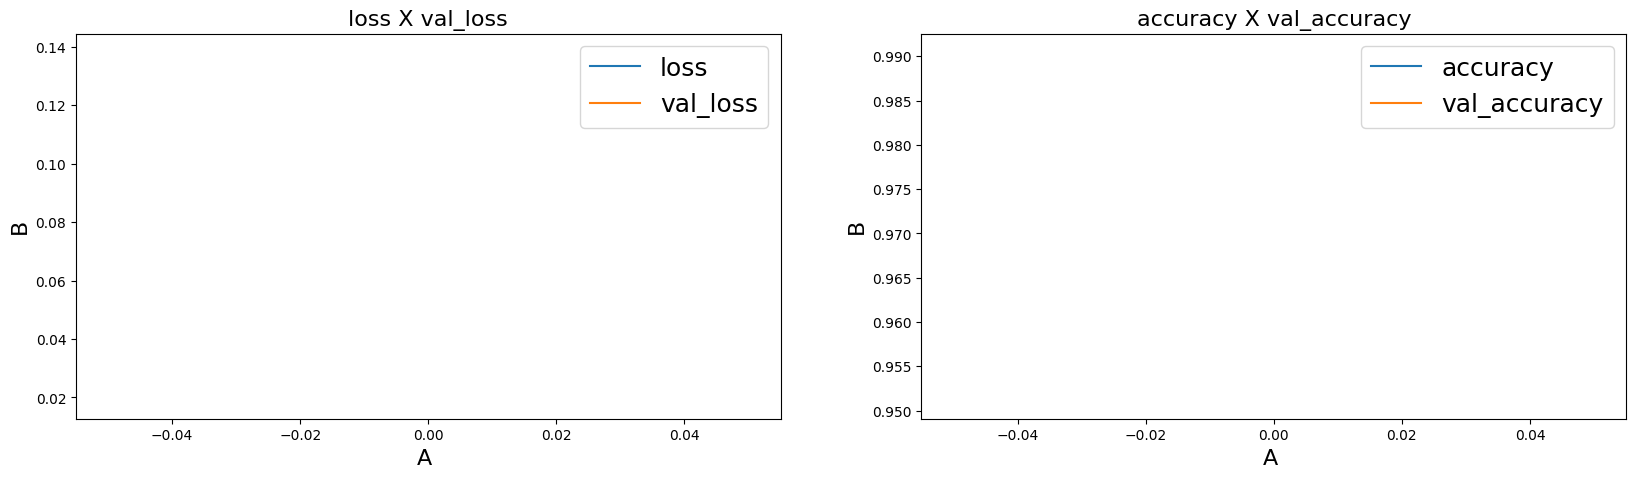

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

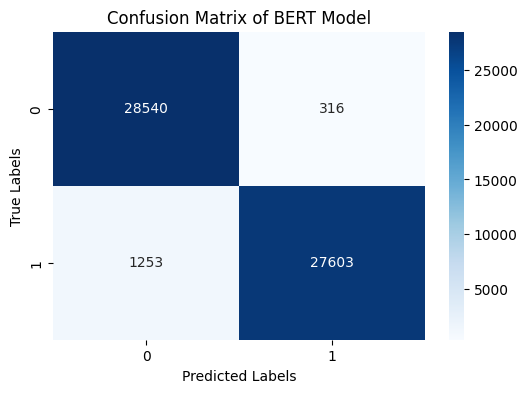

In [ ]:
cm=metrics.confusion_matrix(ytest, y_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix of BERT Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
scored_model_BERT

[{'Model': 'BERT',
  'Precision': 0.9733123420207428,
  'Accuracy': 0.9728132797338509,
  'Recall': 0.9728132797338509,
  'f1': 0.9728061113996298}]

In [ ]:
from collections import Counter

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(clean_corpus)
sequences = tok.texts_to_sequences(clean_corpus)
sequences_matrix = tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
print('Original dataset shape %s' % Counter(train.toxic))

sm = SMOTE()
X_resampled, Y_resampled = sm.fit_resample(sequences_matrix, train.toxic)
print('Resampled dataset shape %s' % Counter(Y_resampled))

Original dataset shape Counter({0: 144277, 1: 15294})
Resampled dataset shape Counter({0: 144277, 1: 144277})


In [ ]:
train.toxic.shape

(159571,)

In [ ]:
Y_resampled.shape

(288554,)

In [ ]:
y_resampled = Y_resampled.reset_index(drop=True)
y = train.toxic.reset_index(drop=True)
synthetic_indices = np.where(y_resampled.to_numpy() != y.to_numpy())[0]
synthetic_samples = X_resampled[synthetic_indices]

<ipython-input-73-b29afd39f00b>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  synthetic_indices = np.where(y_resampled.to_numpy() != y.to_numpy())[0]


In [ ]:
sequences_matrix[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 557,   4,   9, 547, 651,  65, 417,
        60,  10,  35, 262,   5,   2,  77], dtype=int32)

In [ ]:
synthetic_samples

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 575,   5,  12, 565, 671,  74,   3, 433,  69,  13,  22,   3,
         41, 276,   6,   2,  87,   9,  30]], dtype=int32)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y,stratify=Y,
                                                  random_state=42,
                                                  test_size=0.3, shuffle=True)
xtest,xval,ytest,yval=train_test_split(xtest,ytest,stratify=ytest,random_state=42,test_size=0.33,shuffle=True)

In [ ]:
def RNN():
    model = Sequential()
    model.add(Embedding(max_words,50,input_length=max_len))
    model.add(LSTM(64))
    model.add(Dense(256,name='FC1'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,name='out_layer'))
    model.add(Activation('relu'))
    return model

In [ ]:
checkpoint = ModelCheckpoint(
    'model.h5',
    monitor = 'val_loss',
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    verbose = 1,
    patience = 5,
    min_lr = 0.001
)

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
 activation_3 (Activation)   (None, 1)                

In [ ]:
history = model.fit(
    xtrain,
    ytrain,
    epochs = 7,
    batch_size = 32,
    validation_data = (xval, yval),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
6313/6313 [==============================] - 112s 17ms/step - loss: 0.6524 - accuracy: 0.7805 - val_loss: 0.5758 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 2/7
6313/6313 [==============================] - 106s 17ms/step - loss: 0.6693 - accuracy: 0.8414 - val_loss: 0.7708 - val_accuracy: 0.8548 - lr: 0.0010
Epoch 3/7
6313/6313 [==============================] - 77s 12ms/step - loss: 0.7039 - accuracy: 0.8484 - val_loss: 0.8940 - val_accuracy: 0.8068 - lr: 0.0010
Epoch 4/7
6313/6313 [==============================] - 82s 13ms/step - loss: 0.7704 - accuracy: 0.8540 - val_loss: 0.7133 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 5/7
6313/6313 [==============================] - 73s 12ms/step - loss: 0.7340 - accuracy: 0.8558 - val_loss: 0.6644 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 6/7
6313/6313 [==============================] - 73s 12ms/step - loss: 0.7459 - accuracy: 0.8619 - val_loss: 0.7482 - val_accuracy: 0.8534 - lr: 0.0010
Epoch 7/7
6313/6313 [=============================

In [ ]:
target_classes=["Non Toxic","Toxic"]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

In [ ]:
y_preds = (model.predict(xtest)>0.5)
print("\nClassification Report : ")
print(classification_report(ytest, y_preds, target_names=target_classes))
metrics.confusion_matrix(ytest, y_preds)

1813/1813 [==============================] - 7s 4ms/step

Classification Report : 
              precision    recall  f1-score   support

   Non Toxic       0.90      0.81      0.86     29000
       Toxic       0.83      0.91      0.87     28999

    accuracy                           0.86     57999
   macro avg       0.87      0.86      0.86     57999
weighted avg       0.87      0.86      0.86     57999



array([[23544,  5456],
       [ 2490, 26509]])

In [ ]:
accr = accuracy_score(ytest,y_preds)
prec = precision_score(ytest, y_preds, average='weighted')
rec = recall_score(ytest, y_preds, average='weighted')
f1 = f1_score(ytest, y_preds, average='weighted')
scored_model_BERT.append({'Model': 'BERT','Precision': prec,'Accuracy':accr,'Recall':rec,'f1':f1})

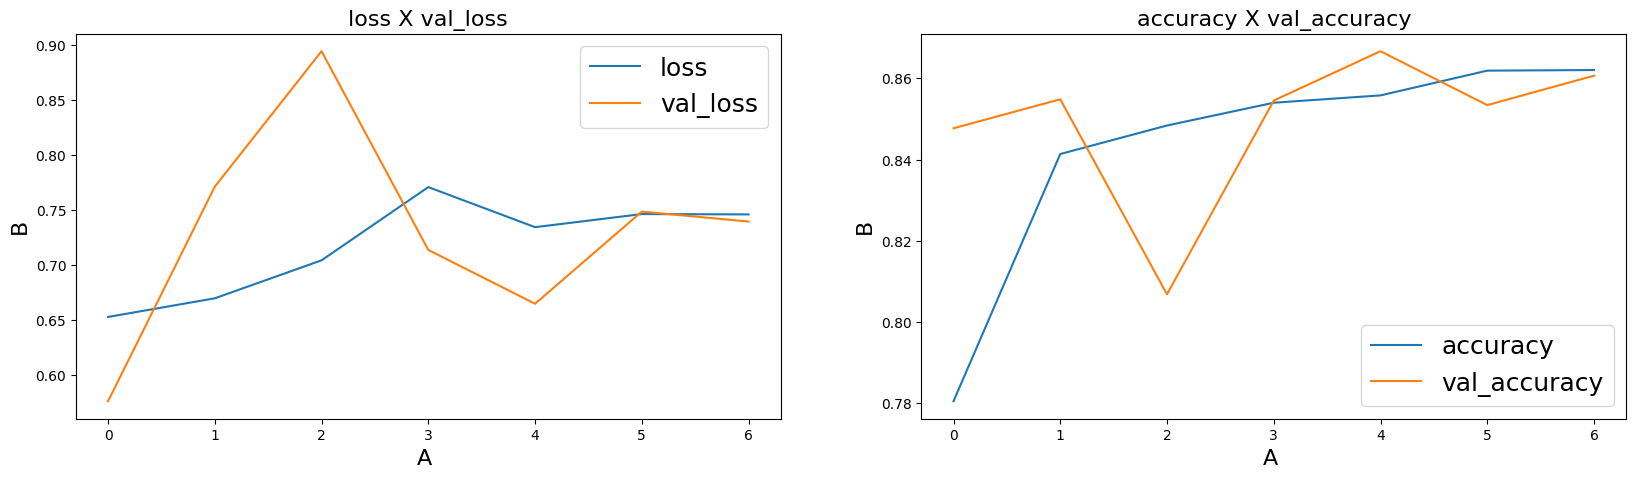

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SimpleRNN,GRU

In [ ]:
def GRU_MODEL():
     model = Sequential()
     model.add(Embedding(max_words,50,input_length=max_len))
     model.add(Dropout(0.5))
     model.add(GRU(300))
     model.add(Dense(256,activation='relu'))
     model.add(Dense(1, activation='relu'))
     return model

In [ ]:
model = GRU_MODEL()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 dropout_40 (Dropout)        (None, 150, 50)           0         
                                                                 
 gru (GRU)                   (None, 300)               316800    
                                                                 
 dense_2 (Dense)             (None, 256)               77056     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 444,113
Trainable params: 444,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    xtrain,
    ytrain,
    epochs = 7,
    batch_size = 32,
    validation_data = (xval, yval),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
6313/6313 [==============================] - 87s 13ms/step - loss: 0.6455 - accuracy: 0.7780 - val_loss: 0.5330 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 2/7
6313/6313 [==============================] - 85s 13ms/step - loss: 0.6186 - accuracy: 0.8336 - val_loss: 0.5880 - val_accuracy: 0.8399 - lr: 0.0010
Epoch 3/7
6313/6313 [==============================] - 85s 13ms/step - loss: 0.6643 - accuracy: 0.8421 - val_loss: 0.6270 - val_accuracy: 0.8608 - lr: 0.0010
Epoch 4/7
6313/6313 [==============================] - 85s 13ms/step - loss: 0.6384 - accuracy: 0.8492 - val_loss: 0.7021 - val_accuracy: 0.8649 - lr: 0.0010
Epoch 5/7
6313/6313 [==============================] - 84s 13ms/step - loss: 0.6418 - accuracy: 0.8535 - val_loss: 0.6034 - val_accuracy: 0.8625 - lr: 0.0010
Epoch 6/7
6313/6313 [==============================] - 85s 13ms/step - loss: 0.6620 - accuracy: 0.8548 - val_loss: 0.5959 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 7/7
6313/6313 [==============================]

In [ ]:
y_preds = (model.predict(xtest)>0.5)
print("\nClassification Report : ")
print(classification_report(ytest, y_preds, target_names=target_classes))
metrics.confusion_matrix(ytest, y_preds)
accr = accuracy_score(ytest,y_preds)
prec = precision_score(ytest, y_preds, average='weighted')
rec = recall_score(ytest, y_preds, average='weighted')
f1 = f1_score(ytest, y_preds, average='weighted')
scored_model_BERT.append({'Model': 'BERT','Precision': prec,'Accuracy':accr,'Recall':rec,'f1':f1})

1813/1813 [==============================] - 15s 7ms/step

Classification Report : 
              precision    recall  f1-score   support

   Non Toxic       0.92      0.75      0.83     29000
       Toxic       0.79      0.93      0.86     28999

    accuracy                           0.84     57999
   macro avg       0.85      0.84      0.84     57999
weighted avg       0.85      0.84      0.84     57999



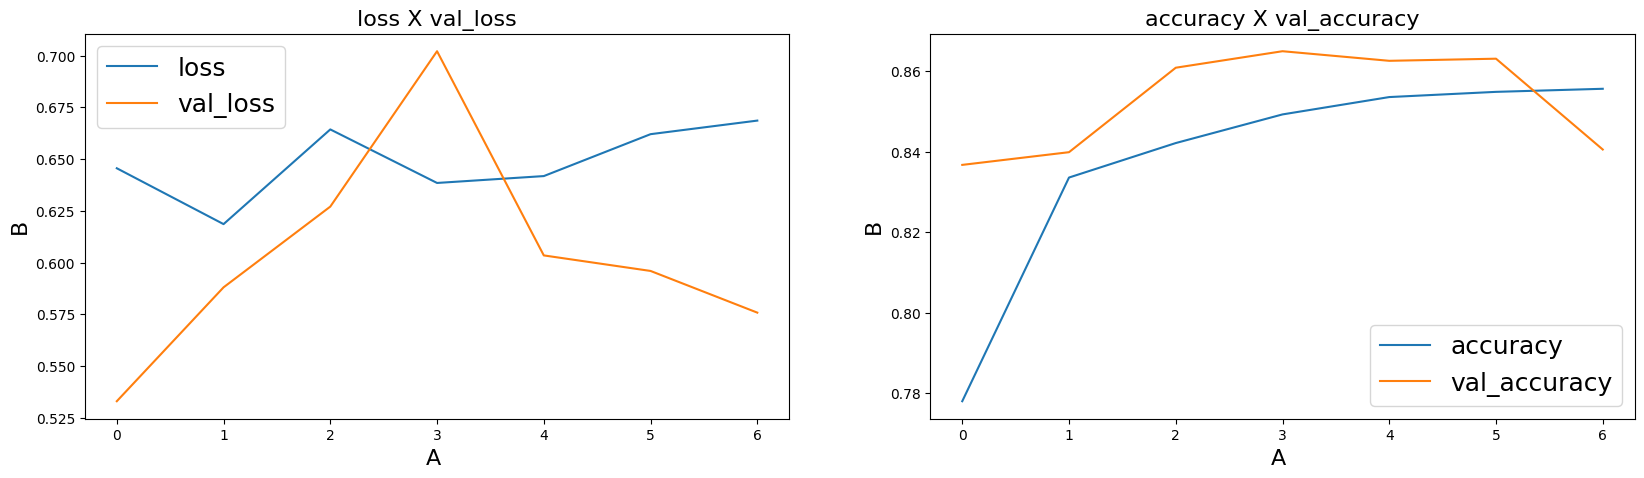

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
scored_model_BERT

[{'Model': 'BERT',
  'Precision': 0.9733123420207428,
  'Accuracy': 0.9728132797338509,
  'Recall': 0.9728132797338509,
  'f1': 0.9728061113996298},
 {'Model': 'BERT',
  'Precision': 0.8668352238267102,
  'Accuracy': 0.8629976378903085,
  'Recall': 0.8629976378903085,
  'f1': 0.8626385346155914},
 {'Model': 'BERT',
  'Precision': 0.8541977607640897,
  'Accuracy': 0.8424110760530354,
  'Recall': 0.8424110760530354,
  'f1': 0.8410893527670987}]

0    144277
1    144277
Name: toxic, dtype: int64